<a href="https://www.kaggle.com/code/waseemnagahhenes/lung-cancer-with-98-accuracy?scriptVersionId=120992600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (/////by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/16 - Copy (2) - Copy.png
/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Normal cases/11 - Copy.png
/kaggle/input/lung-cancer-dataset-iq-othnccd/

# Import Packages

In [2]:
# import the library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
import os
import imageio


#from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix
import tensorflow as tf
import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import load_img, img_to_array

## Define the Hyperparameters

In [3]:
# Create the Hyperparameters
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=20
CHANNELS=3

# Load the Dataset

## Read The Dataset

In [4]:
# Read the dataset using directory
directory = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2073 files belonging to 3 classes.


## Load class names

In [5]:
# get class names associated with dataset images
categories = directory.class_names
print(repr(categories))

['Bengin cases', 'Malignant cases', 'Normal cases']


# Exploratory Data Analysis

## Identify the Images properties variation

In [6]:
# initialze an empty dictionary to carry the size of each image
size_data = {}
for i in categories:
    path = os.path.join('/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset', i)
    class_num = categories.index(i)
    temp_dict = {}

    # iterate over the images in the dataset
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath)
        Original_image_Size = np.shape(img)
        if len(Original_image_Size) > 2:
          
          # get height, width and channels for each image
            height, width, channels = cv2.imread(filepath).shape
            if str(height) + ' x ' + str(width) in temp_dict:
                temp_dict[str(height) + ' x ' + str(width)] += 1 
            else:
                temp_dict[str(height) + ' x ' + str(width)] = 1
                
    size_data[i] = temp_dict
        
size_data

{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '298 x 412': 1,
  '247 x 341': 1,
  '288 x 426': 1,
  '303 x 365': 1,
  '326 x 448': 1,
  '283 x 412': 1,
  '356 x 476': 1,
  '197 x 362': 1,
  '261 x 434': 1,
  '334 x 409': 1,
  '307 x 452': 1,
  '294 x 447': 1,
  '291 x 416': 1,
  '340 x 485': 1,
  '252 x 359': 1,
  '261 x 375': 1,
  '263 x 365': 1,
  '289 x 418': 2,
  '193 x 403': 1,
  '344 x 425': 1,
  '874 x 1200': 1,
  '255 x 439': 1,
  '318 x 383': 1,
  '341 x 487': 1,
  '282 x 389': 1,
  '314 x 425': 1,
  '192 x 263': 1,
  '263 x 397': 1,
  '261 x 436': 1,
  '274 x 409': 1,
  '147 x 217': 1,
  '325 x 388': 1,
  '512 x 623': 31,
  '355 x 460': 1,
  '273 x 355': 1,
  '328 x 384': 1,
  '287 x 448': 1,
  '231 x 380': 2,
  '322 x 409': 1,
  '228 x 414': 1,
  '316 x 429': 1,
  '245 x 384': 1,
  '156 x 218': 1,
  '322 x 456': 1,
  '295 x 391': 1,
  '269 x 456': 1,
  '292 x 413': 1,
  '372 x 406': 1,
  '512 x 801': 28,
  '154 x 206': 1,
  '284 x 416': 3,
  '

## Display the image properties associated with each class

In [7]:
# get the number of images for each image size in the dataset
for key in size_data:
  print(key, '->', size_data[key])

Bengin cases -> {'512 x 512': 120}
Malignant cases -> {'512 x 512': 501, '298 x 412': 1, '247 x 341': 1, '288 x 426': 1, '303 x 365': 1, '326 x 448': 1, '283 x 412': 1, '356 x 476': 1, '197 x 362': 1, '261 x 434': 1, '334 x 409': 1, '307 x 452': 1, '294 x 447': 1, '291 x 416': 1, '340 x 485': 1, '252 x 359': 1, '261 x 375': 1, '263 x 365': 1, '289 x 418': 2, '193 x 403': 1, '344 x 425': 1, '874 x 1200': 1, '255 x 439': 1, '318 x 383': 1, '341 x 487': 1, '282 x 389': 1, '314 x 425': 1, '192 x 263': 1, '263 x 397': 1, '261 x 436': 1, '274 x 409': 1, '147 x 217': 1, '325 x 388': 1, '512 x 623': 31, '355 x 460': 1, '273 x 355': 1, '328 x 384': 1, '287 x 448': 1, '231 x 380': 2, '322 x 409': 1, '228 x 414': 1, '316 x 429': 1, '245 x 384': 1, '156 x 218': 1, '322 x 456': 1, '295 x 391': 1, '269 x 456': 1, '292 x 413': 1, '372 x 406': 1, '512 x 801': 28, '154 x 206': 1, '284 x 416': 3, '161 x 224': 1, '325 x 448': 1, '302 x 385': 1, '300 x 404': 1, '339 x 488': 1, '272 x 403': 1, '243 x 338':

## Display the image classes with number of images 
the properties (Rows * Columns * Depth)

In [8]:
# list the image classes to be passed later to the charts
image_classes = list(size_data.keys())
number = list(size_data.values())

print(image_classes)
print(number)

['Bengin cases', 'Malignant cases', 'Normal cases']
[{'512 x 512': 120}, {'512 x 512': 501, '298 x 412': 1, '247 x 341': 1, '288 x 426': 1, '303 x 365': 1, '326 x 448': 1, '283 x 412': 1, '356 x 476': 1, '197 x 362': 1, '261 x 434': 1, '334 x 409': 1, '307 x 452': 1, '294 x 447': 1, '291 x 416': 1, '340 x 485': 1, '252 x 359': 1, '261 x 375': 1, '263 x 365': 1, '289 x 418': 2, '193 x 403': 1, '344 x 425': 1, '874 x 1200': 1, '255 x 439': 1, '318 x 383': 1, '341 x 487': 1, '282 x 389': 1, '314 x 425': 1, '192 x 263': 1, '263 x 397': 1, '261 x 436': 1, '274 x 409': 1, '147 x 217': 1, '325 x 388': 1, '512 x 623': 31, '355 x 460': 1, '273 x 355': 1, '328 x 384': 1, '287 x 448': 1, '231 x 380': 2, '322 x 409': 1, '228 x 414': 1, '316 x 429': 1, '245 x 384': 1, '156 x 218': 1, '322 x 456': 1, '295 x 391': 1, '269 x 456': 1, '292 x 413': 1, '372 x 406': 1, '512 x 801': 28, '154 x 206': 1, '284 x 416': 3, '161 x 224': 1, '325 x 448': 1, '302 x 385': 1, '300 x 404': 1, '339 x 488': 1, '272 x 40

## Display the Number of images associated with each class

In [9]:
# get the total number of images on each class
bengin_num = sum(size_data['Bengin cases'].values())
malignant_num = sum(size_data['Malignant cases'].values())
normal_num = sum(size_data['Normal cases'].values())

print("Number of Benign Cases ->", bengin_num)
print("Number of Malignant Cases ->", malignant_num)
print("Number of Normal Cases ->", normal_num)

Number of Benign Cases -> 120
Number of Malignant Cases -> 1339
Number of Normal Cases -> 614


In [10]:
# list the number of images on each class to be passed later to the charts
num_list = [bengin_num, malignant_num, normal_num]
print(num_list)

[120, 1339, 614]


## Get the total number of images

In [11]:
# get the total number of images
all_image = malignant_num + bengin_num + normal_num
print("Total Number of Images ->", all_image)

Total Number of Images -> 2073


## Display the difference between each class 

#### As we can see here, we have a big difference between the numbers of images on each class so this should be solved later by Autotune the data that will be fed into the network or manually modify the weights of each data class in terms of it's number of images.

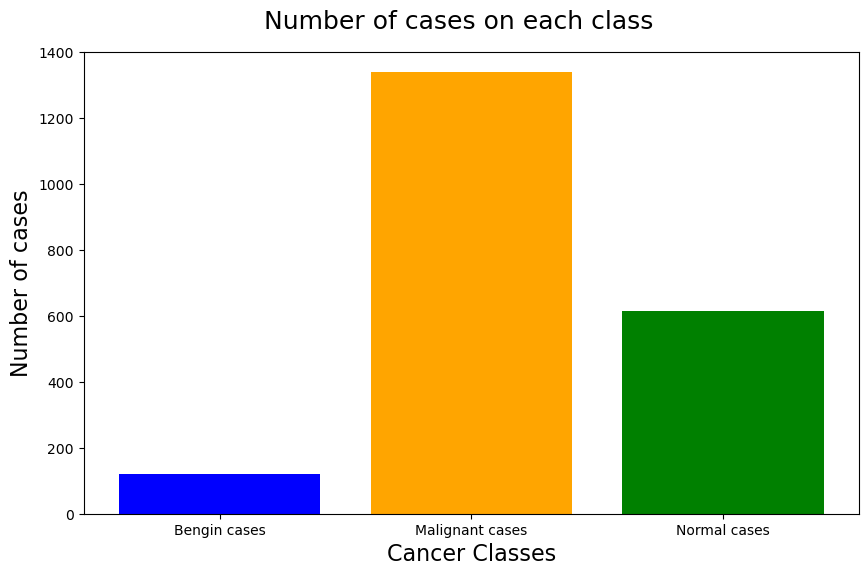

In [12]:
# define the bars colors
c = ['blue', 'orange', 'green']
# define the figure size
plt.rcParams["figure.figsize"] = (10,6)
# make the barchart
plt.bar(range(len(num_list)), num_list, tick_label=image_classes, color = c)
# set the title and labels 
plt.suptitle('Number of cases on each class', y=0.95, fontsize=18)
plt.xlabel('Cancer Classes', fontsize=16)
plt.ylabel('Number of cases', fontsize=16)
# set y-axis limit
plt.ylim([0, 1400])
plt.show()

## Display the percentage of each class in dataset

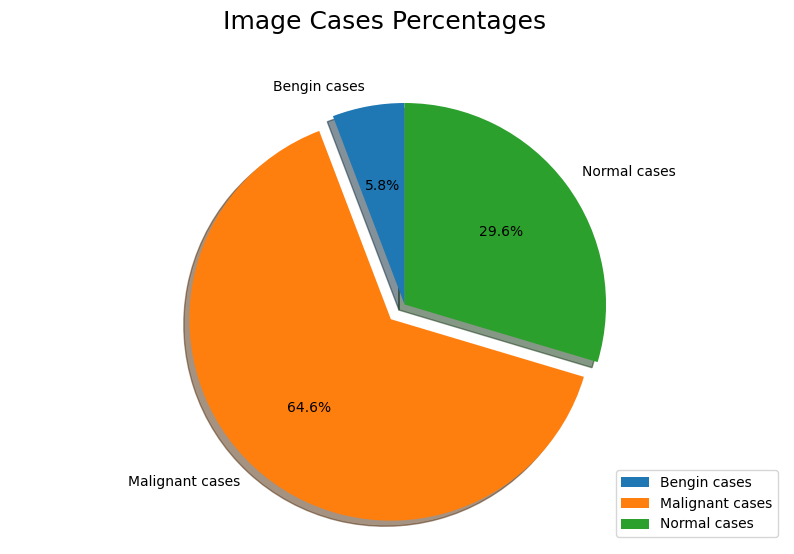

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(num_list, explode=explode, labels=image_classes, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Image Cases Percentages', y=1, fontsize=18)
plt.legend(loc = 'lower right')

plt.show()

## Display the shape of sample image

In [14]:
# print the shape of sample image batch and convert it to numpy array
for image_batch, label_batch in directory.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]], shape=(256, 256, 3), dtype=float32)
[1 2 1 1 1 1 1 1 1 2 0 2 1 0 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 2 1 0
 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 2 1]


## Dataset images Visualization 
(Normal - Malignant - Bengin)

### Display some random images

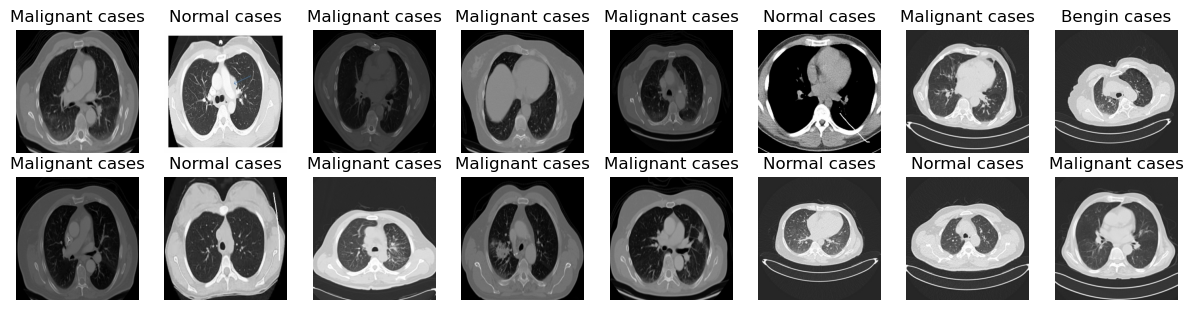

In [15]:
# define the figure size
plt.figure(figsize=(15, 15))
# iterate over the images in the shuffled dataset and take a sample consists of 16 images with their corresponding labels
for image_batch, labels_batch in directory.take(1):
    for i in range(16):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(categories[labels_batch[i]])
        plt.axis("off")

### Display a sample image in each class

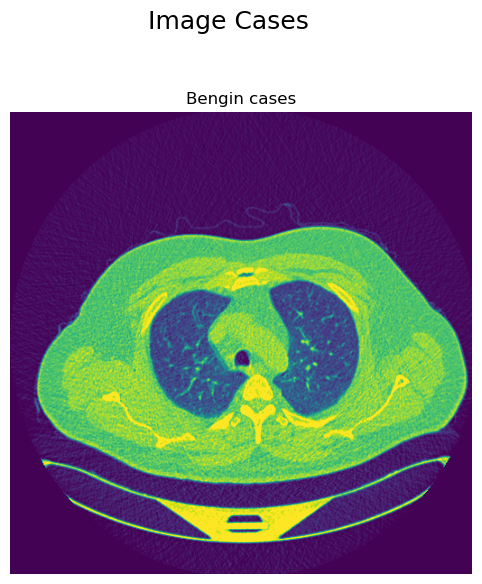

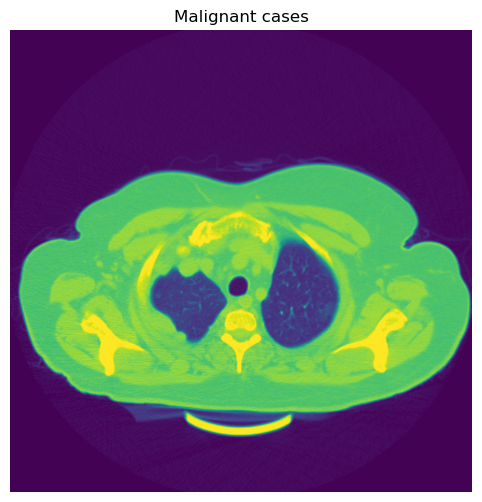

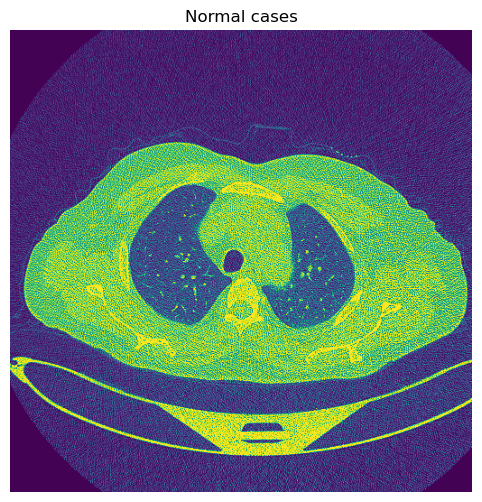

In [16]:
# show a sample from each class of images
plt.suptitle('Image Cases', y=1.05, fontsize=18)
for i in categories:
    path = os.path.join('/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset', i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.axis("off")
        plt.title(i)
        plt.show()
        break

## Apply some image processing filters on each class of images

### Filters Used:

1. GaussianBlur
2. Adaptive thresholding
3. Image Negative
4. Bit Plane Slicing

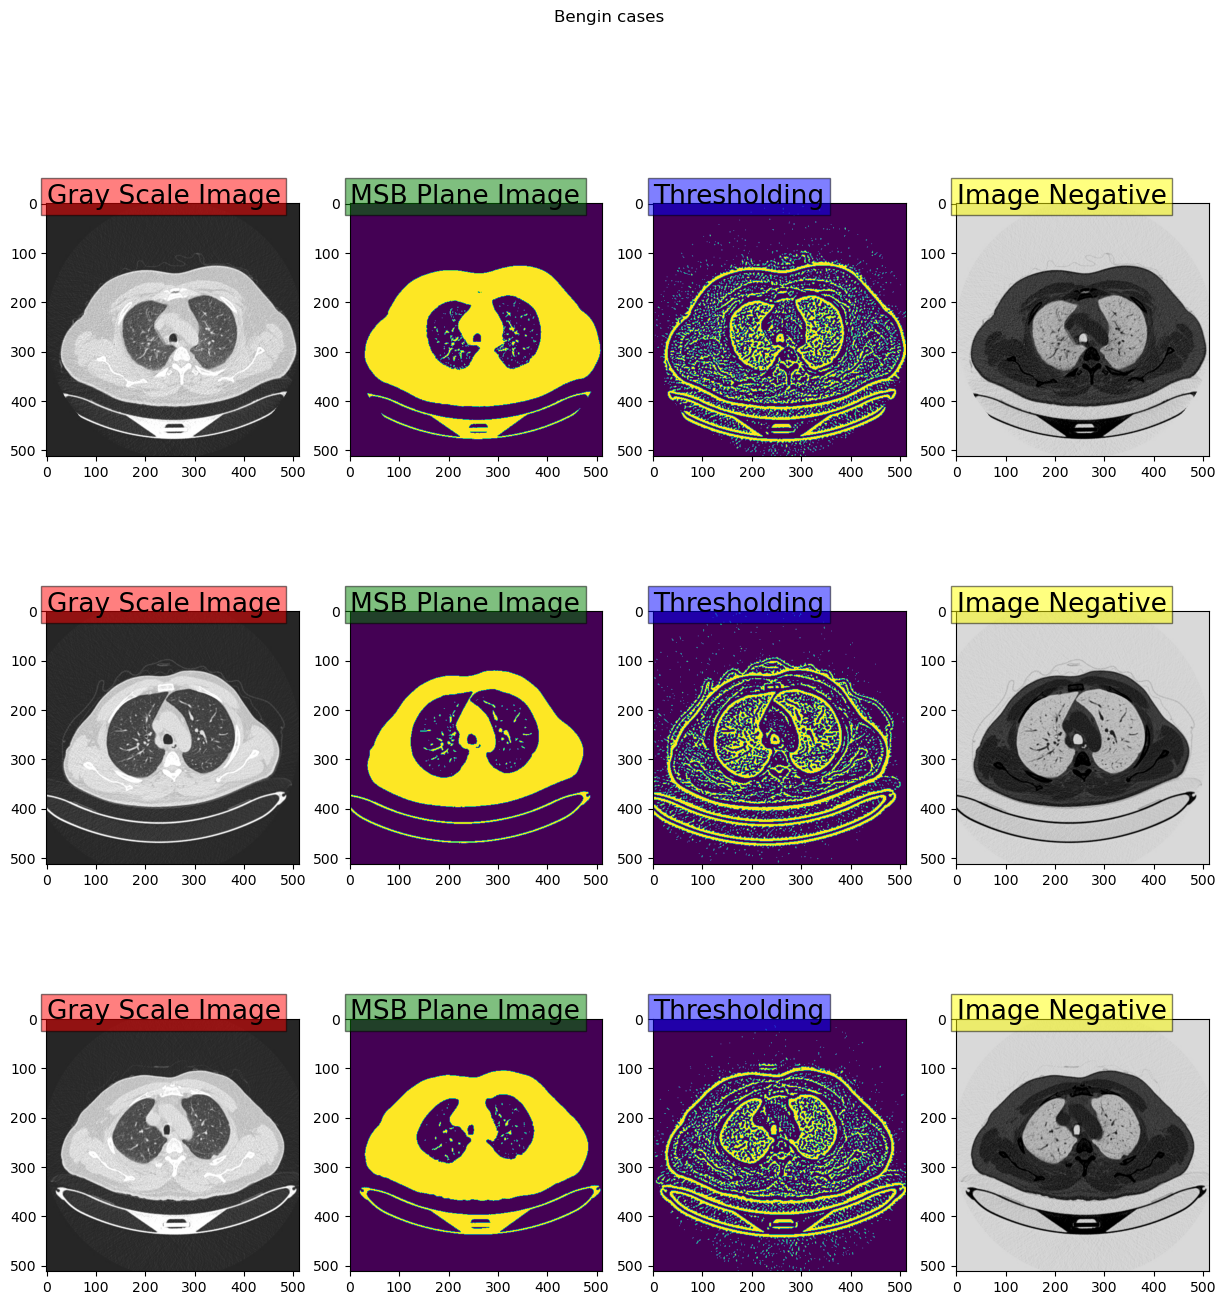

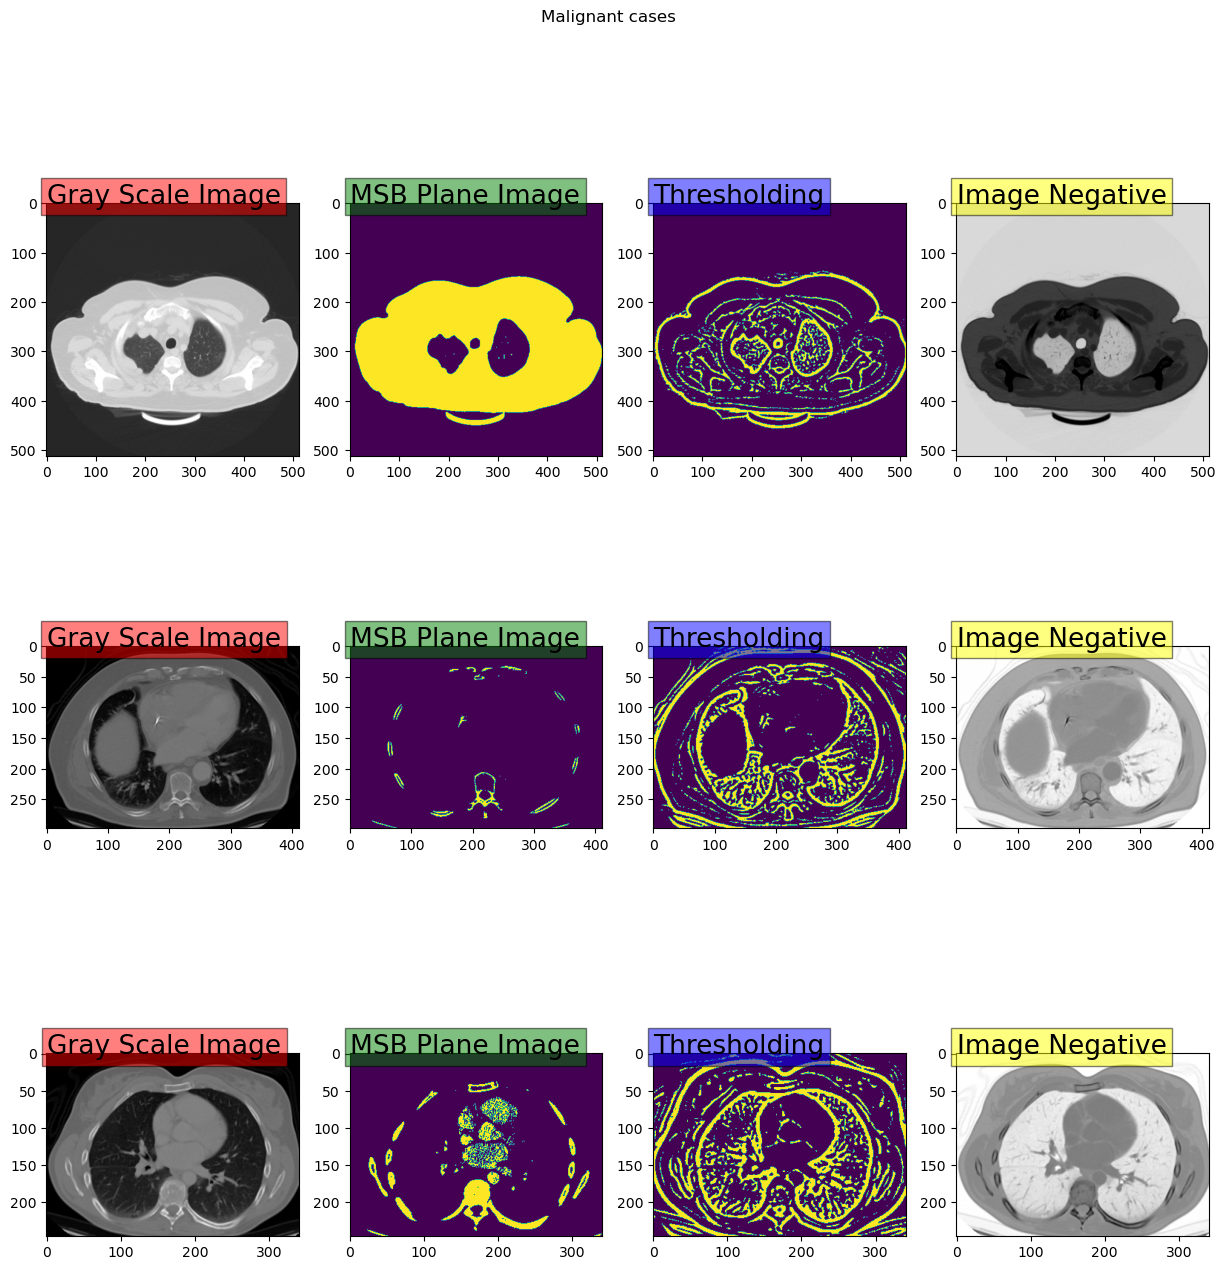

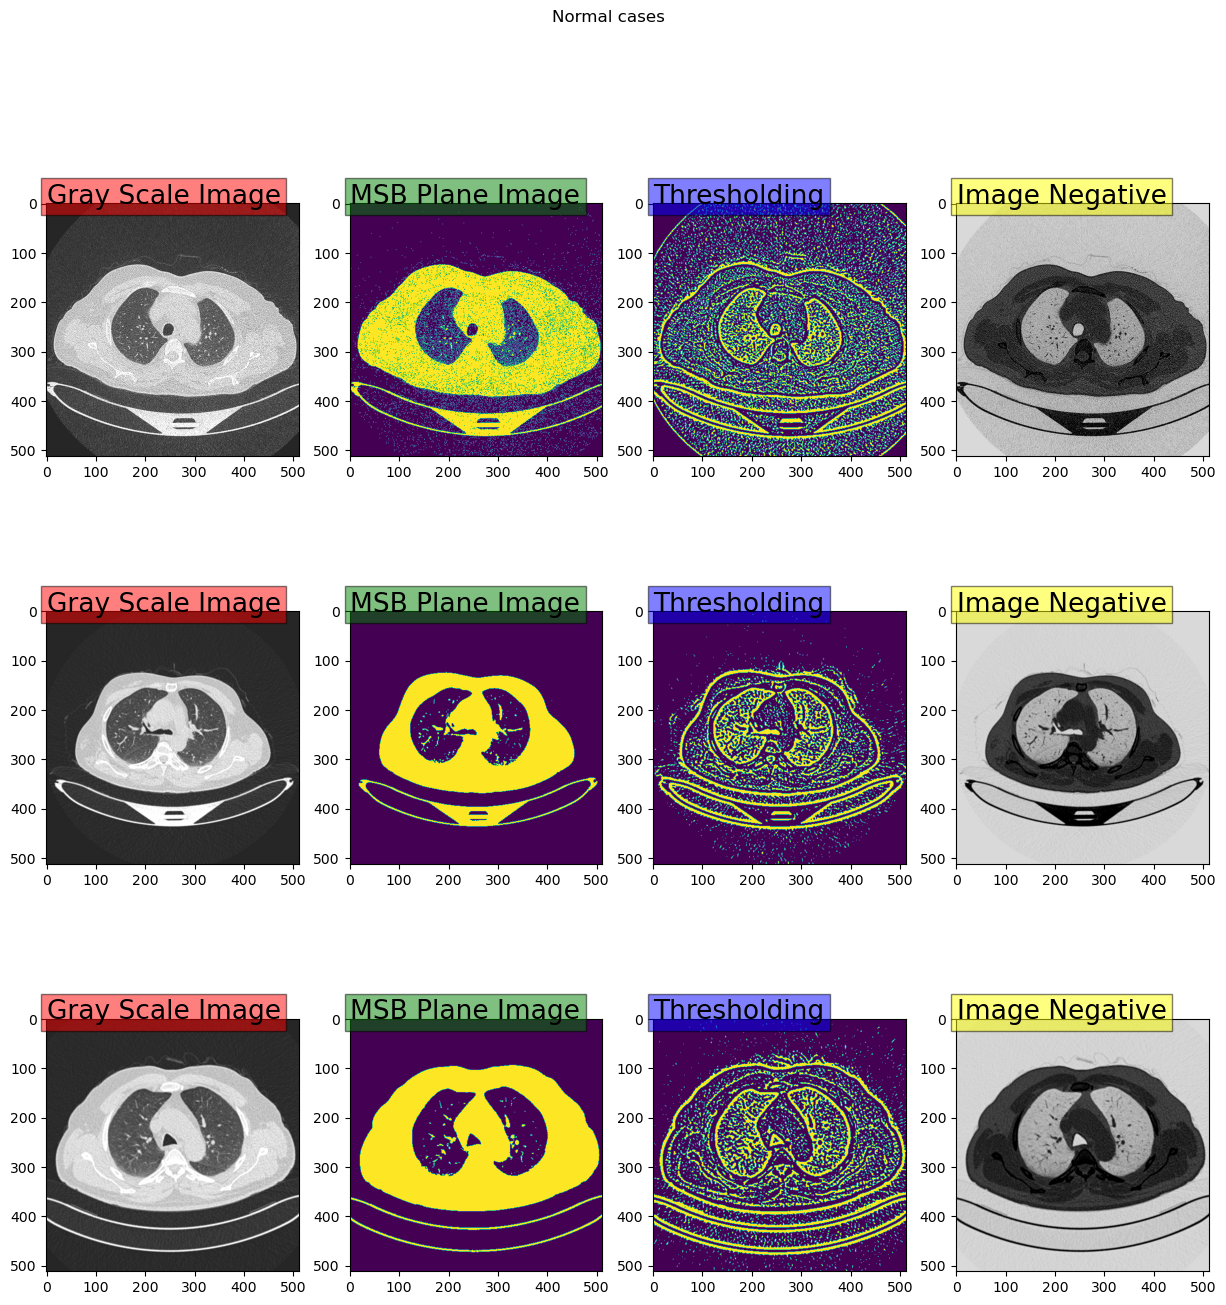

In [17]:
# Apply the filters on class of images
for i in categories:
    # take 3 samples from each class to be proccessed
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 4, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join('/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset', i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath)
        
        # Convert to grayscals
        gray = cv2.imread(filepath, 0)

        # Resizing images with the target image size
        img0 = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

        # Apply GaussianBlur to smooth the image (remove any spark noise that maybe affect the sharpening filters)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply Adaptive thresholding to get the high components (details or edges) in the image
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11, 4)
        thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
        

        # Apply Bit Plane Slicing to select the image with highest details and neglect other planes
        lst = []
        for i in range(gray.shape[0]):
            for j in range(gray.shape[1]):
                lst.append(np.binary_repr(gray[i][j] ,width=8)) # width = no. of bits

        eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(gray.shape[0],gray.shape[1])


        # Apply Image Negative to reverse the image from white to black or vise versa
        arr = np.array(gray)
        invert = np.array(img)
        Max = np.max(invert)
        for i in range(invert.shape[0]):
            for j in range(invert.shape[1]):
                invert[i, j] = Max - invert[i, j]

        # give a title for each image after applying the filter

        ax[cnt, 0].text(0.5, 0.5, 'Gray Scale Image', fontsize=19, bbox=dict(facecolor='red', alpha=0.5))
        ax[cnt, 0].imshow(img)
        ax[cnt, 1].text(0.5, 0.5, 'MSB Plane Image', fontsize=19, bbox=dict(facecolor='green', alpha=0.5))
        ax[cnt, 1].imshow(eight_bit_img)
        ax[cnt, 2].text(0.5, 0.5, 'Thresholding', fontsize=19, bbox=dict(facecolor='blue', alpha=0.5))
        ax[cnt, 2].imshow(thresh)
        ax[cnt, 3].text(0.5, 0.5, 'Image Negative', fontsize=19, bbox=dict(facecolor='yellow', alpha=0.5))
        ax[cnt, 3].imshow(invert)
        cnt += 1
        if cnt == samples:
            break
plt.show()

# Pre-Processing the data
One important step when dealing with image data is to preprocess the data. During the preprocess step you can apply transformations to the dataset that will be fed into your convolutional neural network.

Here you will apply two transformations to the data:

- Reshape the data to size image = 256  as (256,256)

- Normalize the pixel values so that these are values between 0 and 1. You can achieve this by dividing every value in the array by the maximum.

In [18]:
# Resize and Rescale the Data
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
])

## Dataset Partitioning and shuffling

In [19]:
# Split and Shuffle The data, Autotune to the dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)

    # Shuffle the data
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # split the data
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    # Autotune the dataset 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

# call the function to return train data, validation data, test data
train_ds, val_ds, test_ds = get_dataset_partitions_tf(directory)

# CNN architecture

## Define the Architecture

In [20]:
# Handling the shape of image
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 3

# Create the CNN model achitecture
model = tf.keras.models.Sequential([
    # data_normalization
    resize_and_rescale,
    
    # model layers
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

## Define the callbacks
Now complete the callback that will ensure that training will stop after an accuracy of 97% is reached:

In [21]:
# create the callback
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') >= 0.97):
                print("\nReached 97% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True
# Instantiate the callback class
callbacks = myCallback()

## Compiling the model
### The compilation is performed using one single method call called compile.

The compile method requires several parameters. The loss parameter is specified to have type 'sparse_categorical_crossentropy'. The metrics parameter is set to 'accuracy' and finally we use the adam optimizer for training the network.

The output at this stage is shown below −

In [22]:
# create the compiler
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Overview of the Architecture

## Get the model Summary

In [23]:
# Summary for the Layers of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

## Visualize The ANN Architecture
(Layers: Input - Hidden - Output) 

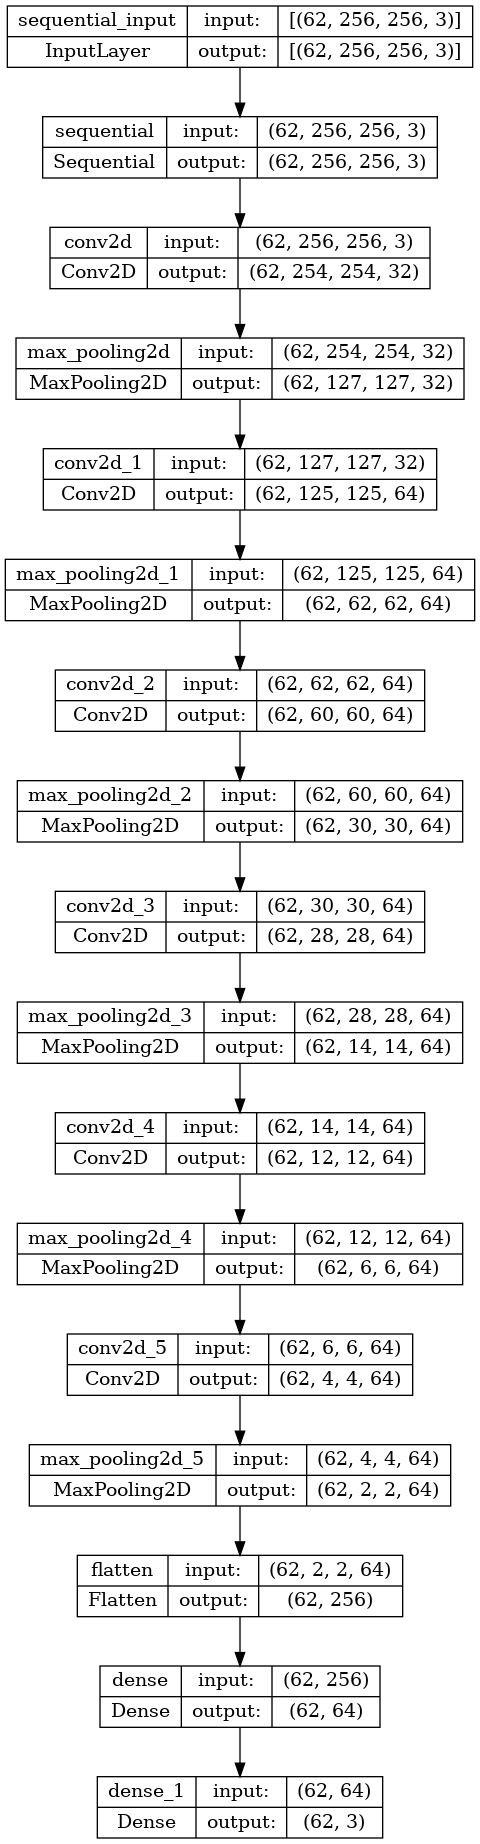

In [24]:
# Visualize the Layers of the Model architecture
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

# Training Phase

## Train the ANN model
### The model training is done in one single method call called fit that takes few parameters as seen in the code below

The first two parameters to the fit method specify the features and the output of the training dataset.

The epochs is set to 20; we assume that the training will converge in max 20 epochs - the iterations. 

The trained model is validated on the test data as specified in the last parameter.

In [25]:
# train the model using fit
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
    callbacks=[callbacks]
)

Epoch 1/20
27/27 [==============================] - 153s 5s/step - loss: 0.9083 - accuracy: 0.6284 - val_loss: 0.8995 - val_accuracy: 0.6344
Epoch 2/20
27/27 [==============================] - 139s 5s/step - loss: 0.8074 - accuracy: 0.6565 - val_loss: 0.7396 - val_accuracy: 0.6613
Epoch 3/20
27/27 [==============================] - 139s 5s/step - loss: 0.6661 - accuracy: 0.6458 - val_loss: 0.6827 - val_accuracy: 0.6344
Epoch 4/20
27/27 [==============================] - 137s 5s/step - loss: 0.6007 - accuracy: 0.6953 - val_loss: 0.5630 - val_accuracy: 0.7849
Epoch 5/20
27/27 [==============================] - 137s 5s/step - loss: 0.5474 - accuracy: 0.7473 - val_loss: 0.5209 - val_accuracy: 0.8011
Epoch 6/20
27/27 [==============================] - 138s 5s/step - loss: 0.4723 - accuracy: 0.7969 - val_loss: 0.4126 - val_accuracy: 0.8656
Epoch 7/20
27/27 [==============================] - 141s 5s/step - loss: 0.3990 - accuracy: 0.8399 - val_loss: 0.4710 - val_accuracy: 0.8548
Epoch 8/20
27

# Visualizing the model Metrics

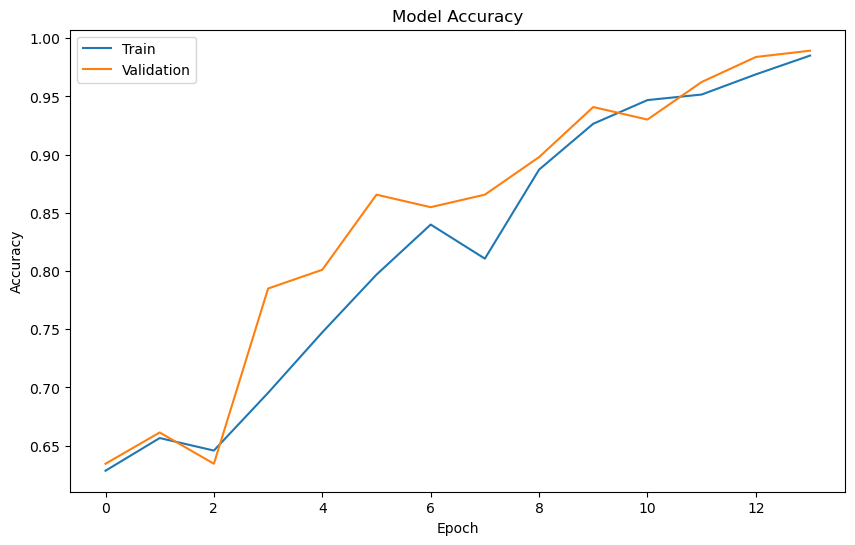

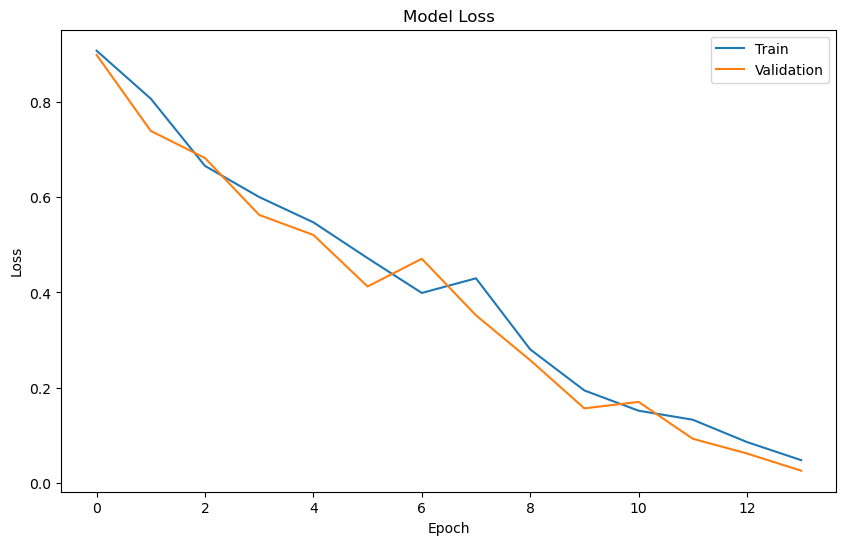

In [26]:
# visualize the model accuracy for the training data and Validation data
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# visualize the model loss for the training data and Validation data
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model Evaluation

In [27]:
# model evaluation to know the accuracy
model.evaluate(test_ds)

4/4 [==============================] - 13s 1s/step - loss: 0.0180 - accuracy: 0.9919


[0.018016139045357704, 0.9919354915618896]

# Testing the model

## Sample image to predict

1/1 [==============================] - 0s 317ms/step


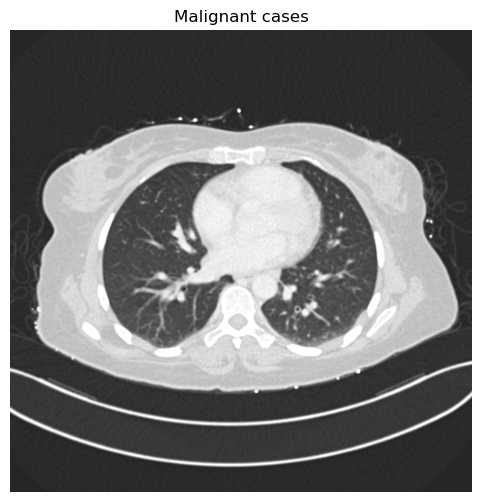

Predicted case -> Malignant cases


In [28]:
# Testing the model using sample image
image_path = "/kaggle/input/lung-cancer-dataset-iq-othnccd/Data/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (116).jpg"
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Malignant cases")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)